# Initial data exploration of the data generated using bgcflow

### Input Dataset before curation

- Source: NCBI, PATRIC, and internal genomes from NBC and CeMiSt collection
- Species selected: Streptomyces albus 
- Number of genomes: 5

In [10]:
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from bgcflow.data.make_genome_dataset import init_genome_dataframe
%matplotlib inline

In [11]:
samples_template_file = "../../config/samples.csv"

df_samples = pd.read_csv(samples_template_file, index_col='genome_id')

In [12]:
df_samples

source                         organism         genus  \
genome_id                                                                
NBC_01270.1      custom       Streptomyces sp. NBC_01270  Streptomyces   
NBC_01171.1      custom       Streptomyces sp. NBC_01171  Streptomyces   
P8-2B-3.1        custom         Streptomyces sp. P8-2B-3  Streptomyces   
GCF_000359525.1    ncbi  Streptomyces albus strain J1074  Streptomyces   
1223307.4        patric       Streptomyces sp. PVA 94-07  Streptomyces   

                species     strain closest_placement_reference  
genome_id                                                       
NBC_01270.1         sp.  NBC_01270             GCF_000719955.1  
NBC_01171.1         sp.  NBC_01171             GCF_004784475.1  
P8-2B-3.1           sp.    P8-2B-3             GCF_000719955.1  
GCF_000359525.1   albus      J1074             GCF_000359525.1  
1223307.4           sp.  PVA 94-07             GCF_000495755.1

In [14]:
seqfu_stats_path = "../../data/processed/tables/df_seqfu_stats.csv"

if os.path.isfile(seqfu_stats_path):
    df_seqfu_stats = pd.read_csv(seqfu_stats_path, index_col='File')

df_seqfu_stats

#Seq  Total bp        Avg      N50      N75      N90  \
File                                                                    
NBC_01270.1         1   7015026  7015026.0  7015026  7015026  7015026   
NBC_01171.1         1   6584863  6584863.0  6584863  6584863  6584863   
P8-2B-3.1           1   7099240  7099240.0  7099240  7099240  7099240   
GCF_000359525.1     1   6841649  6841649.0  6841649  6841649  6841649   
1223307.4           3   7106149  2368716.3  7007517  7007517  7007517   

                         auN      Min      Max  
File                                            
NBC_01270.1      7015026.000  7015026  7015026  
NBC_01171.1      6584863.000  6584863  6584863  
P8-2B-3.1        7099240.000  7099240  7099240  
GCF_000359525.1  6841649.000  6841649  6841649  
1223307.4        6911162.101    21129  7007517

In [4]:
df_genomes = init_genome_dataframe(fna_dir="../../data/interim/fasta/", df_samples=df_samples)

|████████████████████████████████████████| 5/5 [100%] in 0.6s (8.44/s)


In [5]:
selected_columns = ['genome_len', 'gc_content', 'contigs']
df = df_genomes.copy()

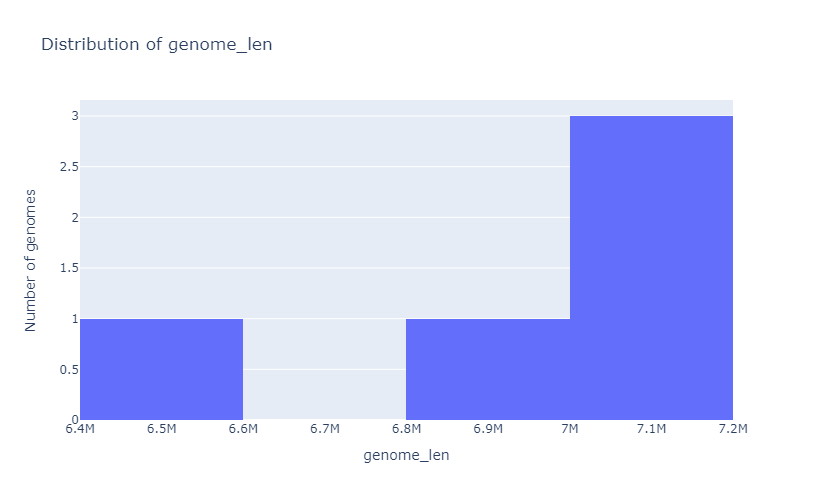

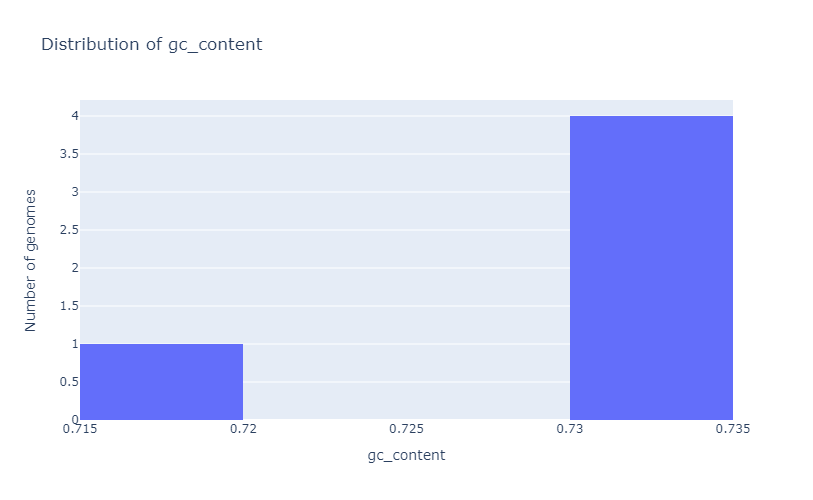

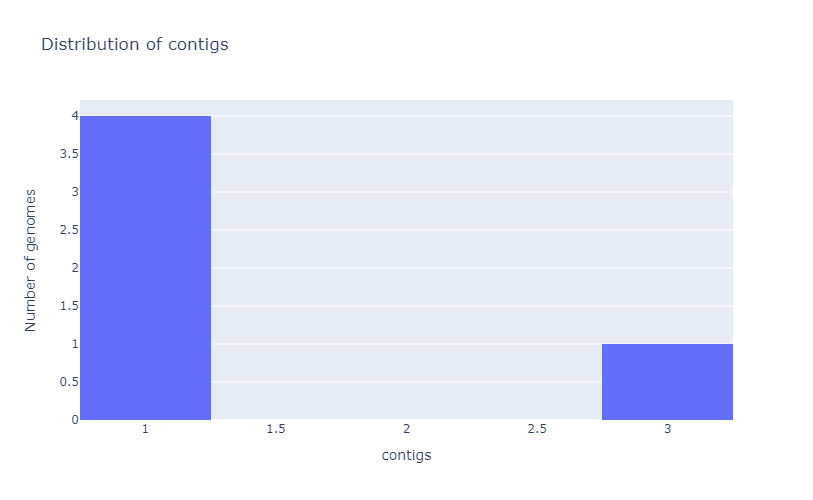

In [6]:
for col in selected_columns:
    title = 'Distribution of ' + col 
    fig = px.histogram(df, x=col, title=title, nbins=5,
                      width=800, height=500)
    fig.update_layout(yaxis_title="Number of genomes")
    fig.show()

### Plot scatter plot of two selected features

For example, here genome length and GC content features are selected

In [7]:
feature1 = 'genome_len'
feature2 = 'gc_content'
df = df_genomes.copy()

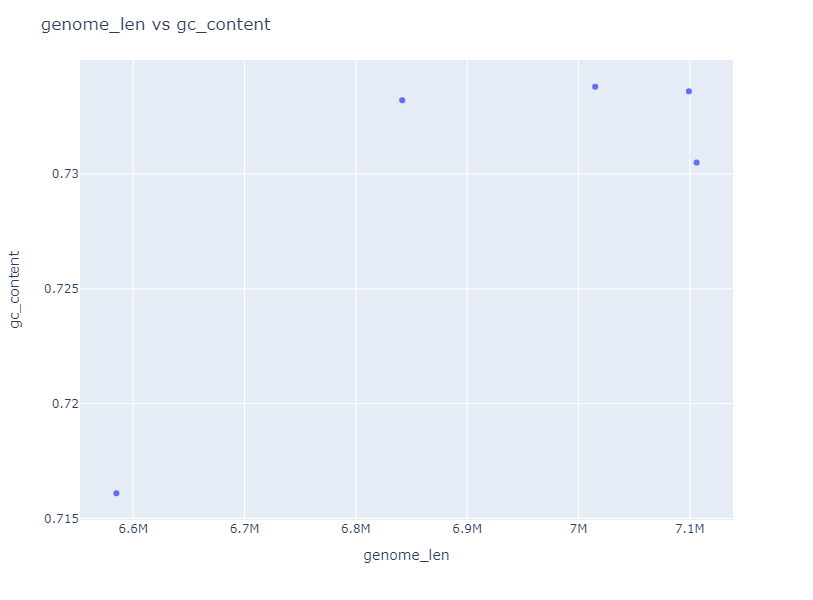

In [8]:
fig = px.scatter(df, x=feature1, y=feature2, 
                 hover_name= df.index, hover_data=df_genomes.columns,
                width=800, height=600)
title = feature1 + ' vs ' + feature2
fig.update_layout(title=title)
fig.show()

In [9]:
df_genomes.to_csv("../../data/processed/tables/df_genomes.csv")